# Support and Resistance Calculations

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
housing_data = pd.read_csv('housingFin.csv',index_col=0)

In [3]:
print(housing_data.columns)
print(housing_data.index)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adjustment Factor',
       'Adjustment Type'],
      dtype='object')
Index(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
       '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
       ...
       '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21', '2018-12-24',
       '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1043)


In [4]:
housing_data['Close'].shape

(1043,)

In [5]:
housing_data.index

Index(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
       '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
       ...
       '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21', '2018-12-24',
       '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1043)

In [6]:
housing_data = housing_data[:200]
housing_data.shape

(200, 7)

In [7]:
housing_data.index

Index(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
       '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
       ...
       '2015-09-24', '2015-09-25', '2015-09-28', '2015-09-29', '2015-09-30',
       '2015-10-01', '2015-10-02', '2015-10-05', '2015-10-06', '2015-10-07'],
      dtype='object', name='Date', length=200)

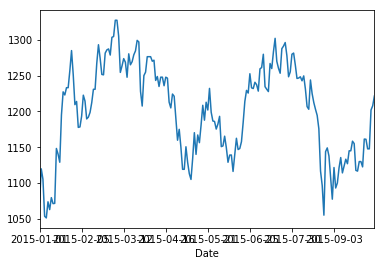

In [8]:
housing_data['Close'].plot()

### Finding First and Second Order Derivatives

In [9]:
from findiff import FinDiff #pip install findiff
dx = 1 #1 day interval
d_dx = FinDiff(0, dx, 1)
d2_dx2 = FinDiff(0, dx, 2)
clarr = np.asarray(housing_data['Close']).astype(float)
mom = d_dx(clarr)
momacc = d2_dx2(clarr)

In [10]:
def get_extrema(isMin):
  return [x for x in range(len(mom))
    if (momacc[x] > 0 if isMin else momacc[x] < 0) and
      (mom[x] == 0 or #slope is 0
        (x != len(mom) - 1 and #check next day
          (mom[x] > 0 and mom[x+1] < 0 and
           housing_data['Close'][x] >= housing_data['Close'][x+1] or
           mom[x] < 0 and mom[x+1] > 0 and
           housing_data['Close'][x] <= housing_data['Close'][x+1]) or
         x != 0 and #previous day
          (mom[x-1] > 0 and mom[x] < 0 and
           housing_data['Close'][x-1] < housing_data['Close'][x] or
           mom[x-1] < 0 and mom[x] > 0 and
           housing_data['Close'][x-1] > housing_data['Close'][x])))]
minimaIdxs, maximaIdxs = get_extrema(True), get_extrema(False)

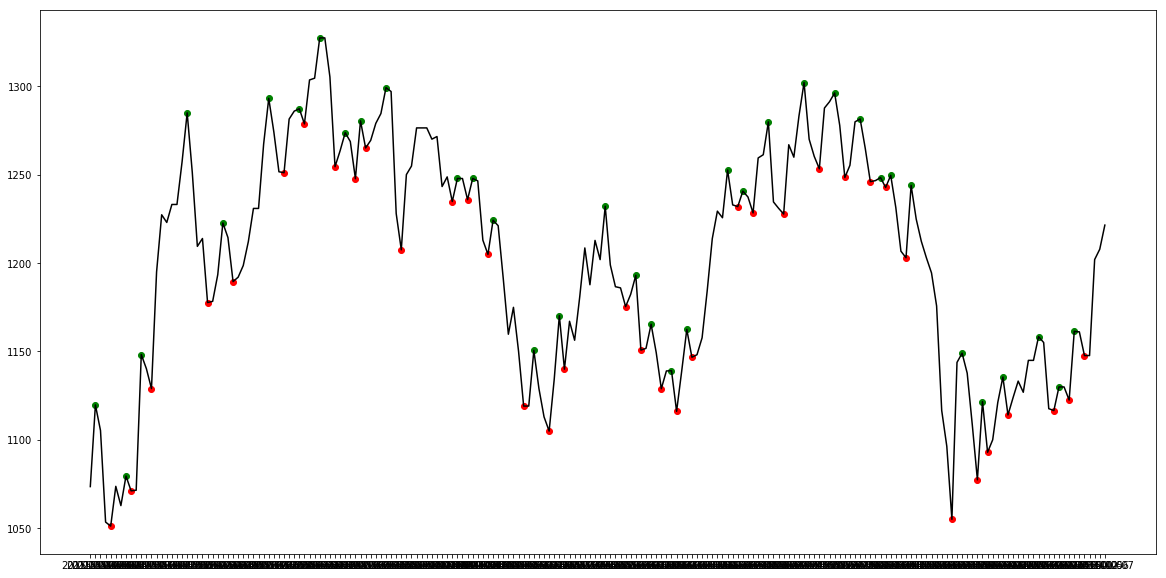

In [11]:
plt.figure(figsize=(20,10))
plt.plot(housing_data['Close'],color='black')
plt.scatter(housing_data.index[minimaIdxs],housing_data['Close'][minimaIdxs],color='r')
plt.scatter(housing_data.index[maximaIdxs],housing_data['Close'][maximaIdxs],color='g')
plt.show()

In [12]:
price_max = max([housing_data['Close'][x] for x in maximaIdxs])
print("Max Price = ",price_max)

price_min = min([housing_data['Close'][x] for x in minimaIdxs])
print("Min Price = ",price_min)

delta_3 = (price_max - price_min)*0.03
print("Price zone width = ",2*delta_3)

delta_5 = (price_max - price_min)*0.05
print("Price zone width = ",2*delta_5)

delta_10 = (price_max - price_min)*0.1
print("Price zone width = ",2*delta_10)

Max Price =  1327.367747
Min Price =  1051.201102
Price zone width =  16.5699987
Price zone width =  27.616664500000002
Price zone width =  55.233329000000005


### Based on the number of minima and maxima in a zone

In [13]:
max_num = 0
resistance_centre = -1
close_price = np.array(housing_data['Close'])
for x in maximaIdxs:
    num_points = 0
    for y in maximaIdxs:
        if abs(close_price[y] - close_price[x])<=delta_10:
            num_points+=1
    if num_points>max_num:
        max_num = num_points
        resistance_centre = x
        
print(close_price[resistance_centre],max_num)

1273.758928 14


In [14]:
max_num = 0
support_centre = -1
for x in minimaIdxs:
    num_points = 0
    for y in minimaIdxs:
        if abs(close_price[y] - close_price[x])<=delta_10:
            num_points+=1
    if num_points>max_num:
        max_num = num_points
        support_centre = x
        
print(close_price[support_centre],max_num)

1228.3595300000002 15


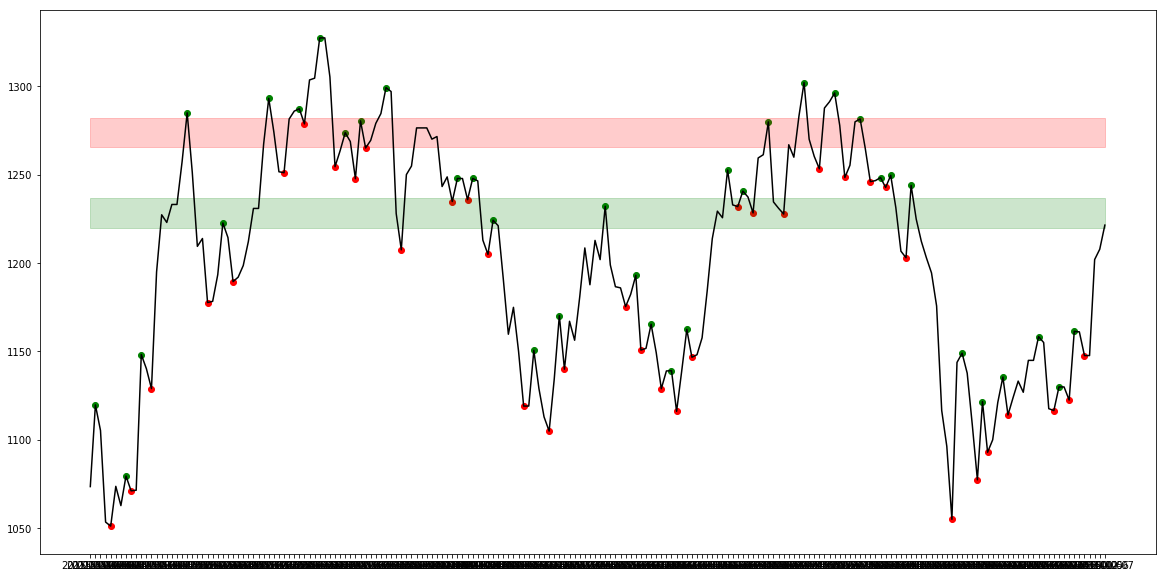

In [15]:
plt.figure(figsize=(20,10))
plt.plot(housing_data['Close'],color='black')
plt.scatter(housing_data.index[minimaIdxs],housing_data['Close'][minimaIdxs],color='r')
plt.scatter(housing_data.index[maximaIdxs],housing_data['Close'][maximaIdxs],color='g')

plt.fill_between(housing_data.index,
                 np.ones([housing_data.index.size])*(housing_data['Close'][resistance_centre] + delta_3),
                np.ones([housing_data.index.size])*(housing_data['Close'][resistance_centre] - delta_3),
                color='red',alpha=0.2)

plt.fill_between(housing_data.index,
                 np.ones([housing_data.index.size])*(housing_data['Close'][support_centre] + delta_3),
                np.ones([housing_data.index.size])*(housing_data['Close'][support_centre] - delta_3),
                color='green',alpha=0.2)

plt.show()

### Giving more preference to recent points and prefering higher highs for resistance and lower lows for support

In [16]:
max_num = 0
resistance_centre_recent = -1
for x in maximaIdxs:
    num_points = 0
    for y in maximaIdxs:
        if (close_price[x] >= close_price[y]) and (close_price[x] - close_price[y])<=delta_5:
            num_points+=y*close_price[y]
    if num_points>max_num:
        max_num = num_points
        resistance_centre_recent = x
        
print(close_price[resistance_centre_recent],max_num)

1252.619523 1088772.88943


In [17]:
min_num = 1
support_centre_recent = -1
for x in minimaIdxs:
    num_points = 0
    for y in minimaIdxs:
        if close_price[y]>close_price[x] and close_price[y]-close_price[x]<=delta_5:
            num_points-=y*(price_max-close_price[y])
    if num_points<min_num:
        min_num = num_points
        support_centre_recent = x
        
print(close_price[support_centre_recent],min_num)

1116.151081 -121477.43669199997


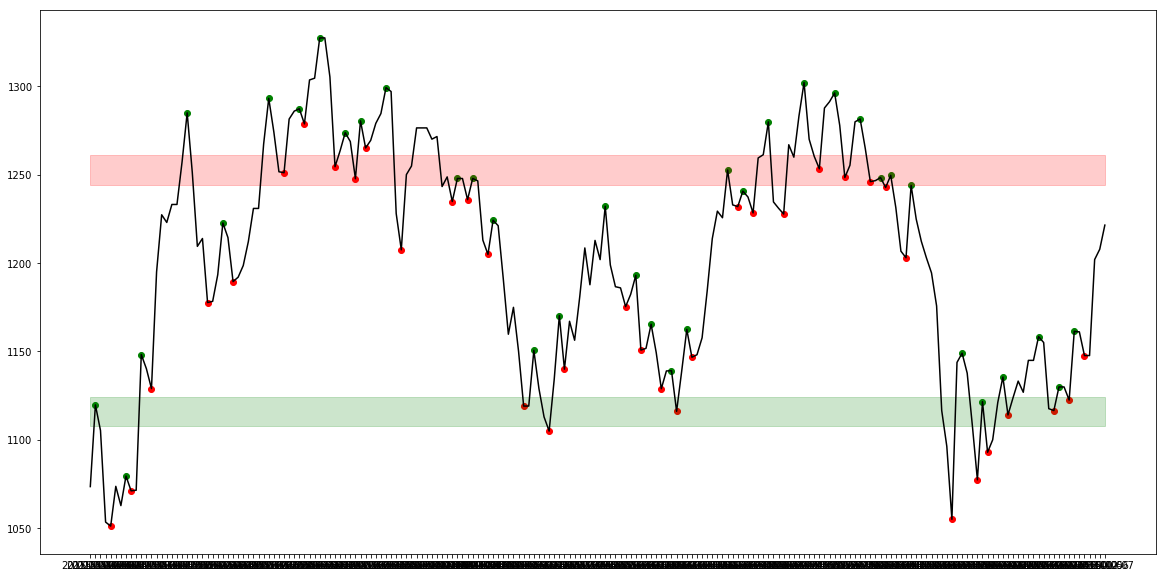

In [18]:
plt.figure(figsize=(20,10))
plt.plot(housing_data['Close'],color='black')
plt.scatter(housing_data.index[minimaIdxs],housing_data['Close'][minimaIdxs],color='r')
plt.scatter(housing_data.index[maximaIdxs],housing_data['Close'][maximaIdxs],color='g')

plt.fill_between(housing_data.index,
                 np.ones([housing_data.index.size])*(housing_data['Close'][resistance_centre_recent] + delta_3),
                np.ones([housing_data.index.size])*(housing_data['Close'][resistance_centre_recent] - delta_3),
                color='red',alpha=0.2)

plt.fill_between(housing_data.index,
                 np.ones([housing_data.index.size])*(housing_data['Close'][support_centre_recent] + delta_3),
                np.ones([housing_data.index.size])*(housing_data['Close'][support_centre_recent] - delta_3),
                color='green',alpha=0.2)

plt.show()

### Buying as soon as we enter support region and shorting as soon as we enter resistance

In [19]:
buy_price = 0
sell_price = 0

resist = False
resistance_price = clarr[resistance_centre_recent]
support_price = clarr[support_centre_recent]

profit = 0
first = True
buy = True

for x in clarr:
    if abs(x-resistance_price) <= abs(x-support_price):
        resist = True
    else:
        resist = False
    
    if first:
        if (resist and (x>=resistance_price or resistance_price - x <= delta_5)) :
            sell_price = x
            buy = False
            first = False
        if not resist and (x<=support_price or x-support_price <= delta_5):
            buy = True
            buy_price = x
            first = False
        continue
        
    if buy and resist and (x>=resistance_price or resistance_price - x <= delta_5):
        profit += x - buy_price
        buy = False
        sell_price = x
        
    if not buy and not resist and (x<=support_price or x-support_price <= delta_5):
        profit += sell_price - x 
        buy = True
        buy_price = x
        
print("Net Profit = ",profit)

Net Profit =  591.2661980000003


### Finding Profit for 5 years dataset

In [20]:
housing_data_large = pd.read_csv('housingFin.csv',index_col=0)
housing_data_large['Close'].shape

(1043,)

In [21]:
from findiff import FinDiff #pip install findiff
dx = 1 #1 day interval
d_dx = FinDiff(0, dx, 1)
d2_dx2 = FinDiff(0, dx, 2)
clarr = np.asarray(housing_data_large['Close']).astype(float)
mom = d_dx(clarr)
momacc = d2_dx2(clarr)

In [22]:
def get_extrema(isMin):
  return [x for x in range(len(mom))
    if (momacc[x] > 0 if isMin else momacc[x] < 0) and
      (mom[x] == 0 or #slope is 0
        (x != len(mom) - 1 and #check next day
          (mom[x] > 0 and mom[x+1] < 0 and
           housing_data_large['Close'][x] >= housing_data_large['Close'][x+1] or
           mom[x] < 0 and mom[x+1] > 0 and
           housing_data_large['Close'][x] <= housing_data_large['Close'][x+1]) or
         x != 0 and #previous day
          (mom[x-1] > 0 and mom[x] < 0 and
           housing_data_large['Close'][x-1] < housing_data_large['Close'][x] or
           mom[x-1] < 0 and mom[x] > 0 and
           housing_data_large['Close'][x-1] > housing_data_large['Close'][x])))]
minimaIdxs, maximaIdxs = get_extrema(True), get_extrema(False)

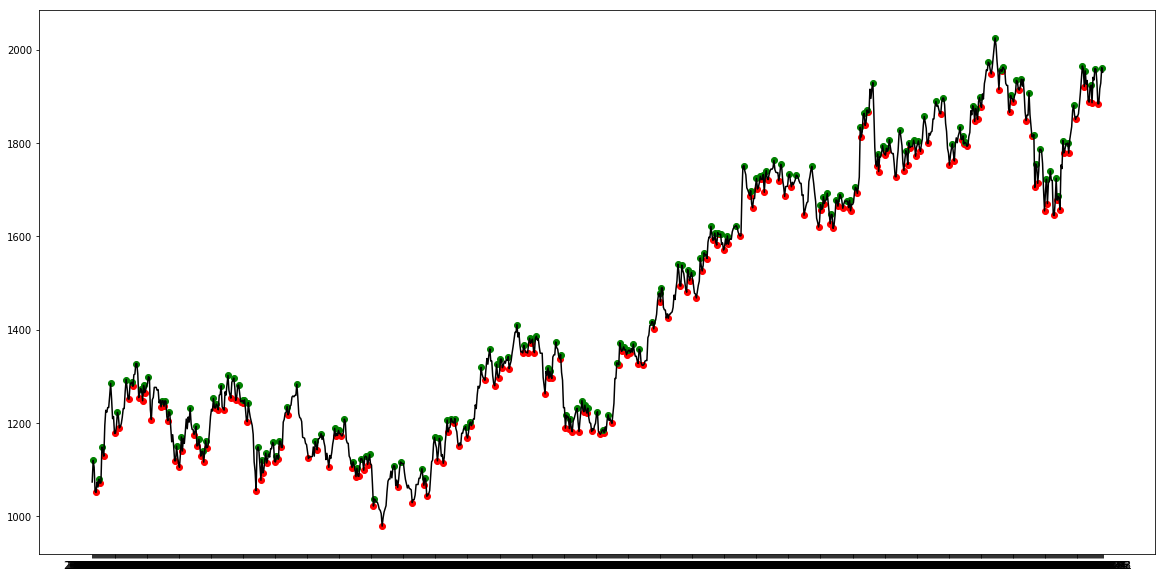

In [23]:
plt.figure(figsize=(20,10))
plt.plot(housing_data_large['Close'],color='black')
plt.scatter(housing_data_large.index[minimaIdxs],housing_data_large['Close'][minimaIdxs],color='r')
plt.scatter(housing_data_large.index[maximaIdxs],housing_data_large['Close'][maximaIdxs],color='g')
plt.show()

In [24]:
price_max = max([housing_data_large['Close'][x] for x in maximaIdxs])
print("Max Price = ",price_max)

price_min = min([housing_data_large['Close'][x] for x in minimaIdxs])
print("Min Price = ",price_min)

delta_3 = (price_max - price_min)*0.03
print("Price zone width = ",2*delta_3)

delta_5 = (price_max - price_min)*0.05
print("Price zone width = ",2*delta_5)

delta_10 = (price_max - price_min)*0.1
print("Price zone width = ",2*delta_10)

Max Price =  2025.5579
Min Price =  978.9648880000001
Price zone width =  62.79558071999999
Price zone width =  104.65930119999999
Price zone width =  209.31860239999997


In [25]:
max_num = 0
resistance_centre_recent = -1
close_price_large = np.array(housing_data_large['Close'])
for x in maximaIdxs:
    num_points = 0
    for y in maximaIdxs:
        if (close_price_large[x] >= close_price_large[y]) and (close_price_large[x] - close_price_large[y])<=delta_5:
            num_points+=y*close_price_large[y]
    if num_points>max_num:
        max_num = num_points
        resistance_centre_recent = x
        
print(close_price_large[resistance_centre_recent],max_num)

1834.353407 27086518.178487998


In [26]:
min_num = 1
support_centre_recent = -1
for x in minimaIdxs:
    num_points = 0
    for y in minimaIdxs:
        if close_price_large[y]>close_price_large[x] and close_price_large[y]-close_price_large[x]<=delta_5:
            num_points-=y*(price_max-close_price_large[y])
    if num_points<min_num:
        min_num = num_points
        support_centre_recent = x
        
print(close_price_large[support_centre_recent],min_num)

1172.1835310000001 -5950643.670700001


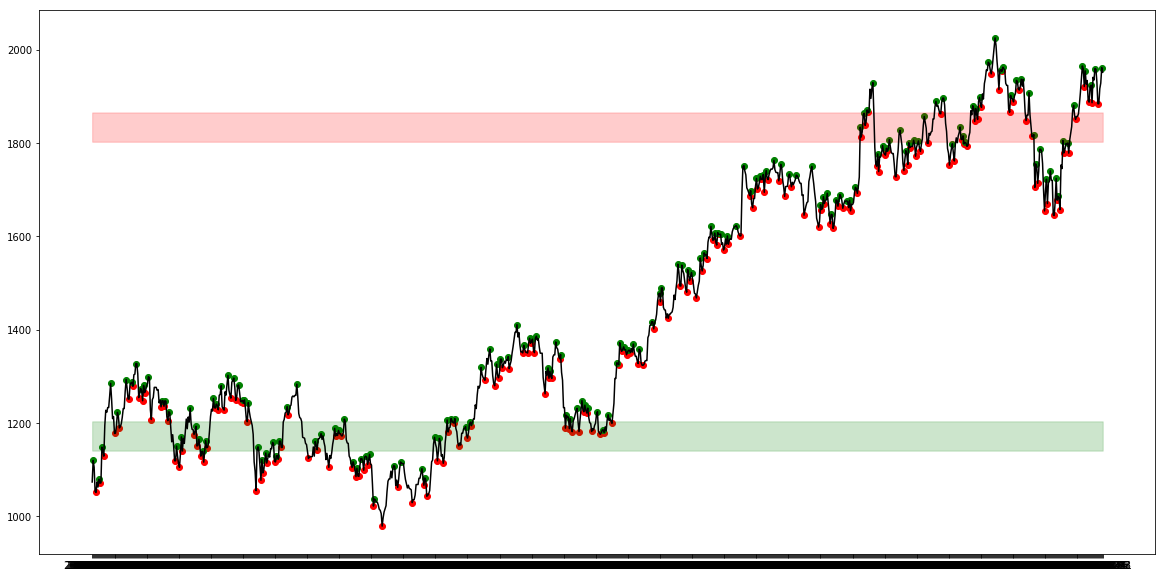

In [27]:
plt.figure(figsize=(20,10))
plt.plot(housing_data_large['Close'],color='black')
plt.scatter(housing_data_large.index[minimaIdxs],housing_data_large['Close'][minimaIdxs],color='r')
plt.scatter(housing_data_large.index[maximaIdxs],housing_data_large['Close'][maximaIdxs],color='g')

plt.fill_between(housing_data_large.index,
                 np.ones([housing_data_large.index.size])*(housing_data_large['Close'][resistance_centre_recent] + delta_3),
                np.ones([housing_data_large.index.size])*(housing_data_large['Close'][resistance_centre_recent] - delta_3),
                color='red',alpha=0.2)

plt.fill_between(housing_data_large.index,
                 np.ones([housing_data_large.index.size])*(housing_data_large['Close'][support_centre_recent] + delta_3),
                np.ones([housing_data_large.index.size])*(housing_data_large['Close'][support_centre_recent] - delta_3),
                color='green',alpha=0.2)

plt.show()

In [29]:
buy_price = 0
sell_price = 0

resist = False
resistance_price = close_price_large[resistance_centre_recent]
support_price = close_price_large[support_centre_recent]

profit = 0
first = True
buy = True

for x in close_price_large:
    if abs(x-resistance_price) <= abs(x-support_price):
        resist = True
    else:
        resist = False
    
    if first:
        if (resist and (x>=resistance_price or resistance_price - x <= delta_5)) :
            sell_price = x
            buy = False
            first = False
        if not resist and (x<=support_price or x-support_price <= delta_5):
            buy = True
            buy_price = x
            first = False
        continue
        
    if buy and resist and (x>=resistance_price or resistance_price - x <= delta_5):
        profit += x - buy_price
        buy = False
        sell_price = x
        
    if not buy and not resist and (x<=support_price or x-support_price <= delta_5):
        profit += sell_price - x 
        buy = True
        buy_price = x
        
print("Net Profit = ",profit)

Net Profit =  760.350868
